#  Analyzing and Visualizing UNESCO Education Statistics #

## STEP 1: Import Libraries and Load the Data

In [19]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\UNESCO_UIS (1).csv") 

# Display the first few rows
print(df.head())


       STRUCTURE                STRUCTURE_ID ACTION FREQ FREQ_LABEL REF_AREA  \
0  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   
1  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   
2  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   
3  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   
4  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   

  REF_AREA_LABEL            INDICATOR  \
0          Aruba  UNESCO_UIS_GRAD_ICT   
1          Aruba  UNESCO_UIS_GRAD_ICT   
2          Aruba  UNESCO_UIS_GRAD_ICT   
3          Aruba  UNESCO_UIS_GRAD_ICT   
4          Aruba  UNESCO_UIS_GRAD_ICT   

                                     INDICATOR_LABEL SEX  ... UNIT_MULT  \
0  Percentage of graduates from ICT programmes in...  _T  ...         0   
1  Percentage of graduates from ICT programmes in...  _T  ...         0   
2  Percentage of graduates from ICT programmes 

- We began by importing the UNESCO UIS dataset (CSV format) into a Pandas DataFrame using Python. This step reads the raw data into memory so it can be processed and analyzed.

## STEP 2: Clean the Dataset by Removing Unnecessary Columns

In [20]:
# List of columns to drop because they are not useful for analysis
columns_to_drop = [
    'STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 
    'SEX', 'AGE', 'URBANISATION', 'UNIT_MEASURE', 
    'COMP_BREAKDOWN_1', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_3',
    'AGG_METHOD', 'DATABASE_ID', 'UNIT_MULT', 'UNIT_TYPE',
    'TIME_FORMAT', 'OBS_STATUS', 'OBS_CONF',
    'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2_LABEL', 'COMP_BREAKDOWN_3_LABEL',
    'AGG_METHOD_LABEL', 'DATABASE_ID_LABEL', 'UNIT_MULT_LABEL', 
    'UNIT_TYPE_LABEL', 'TIME_FORMAT_LABEL', 'OBS_STATUS_LABEL', 
    'OBS_CONF_LABEL'
]

# Drop these columns from the dataframe
df_cleaned = df.drop(columns=columns_to_drop)

# Check the result: display columns now left in dataframe
print("Remaining columns:\n", df_cleaned.columns)


Remaining columns:
 Index(['REF_AREA', 'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL',
       'SEX_LABEL', 'AGE_LABEL', 'URBANISATION_LABEL', 'UNIT_MEASURE_LABEL',
       'TIME_PERIOD', 'OBS_VALUE'],
      dtype='object')


- The original dataset contained many metadata columns that were not useful for analysis (e.g., STRUCTURE, FREQ, UNIT_TYPE, etc.). These were dropped to simplify the dataset and improve focus.

## Step 3: Check for Missing Values and Duplicates

In [21]:
# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check how many duplicate rows exist
duplicates_count = df_cleaned.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)


Missing values per column:
 REF_AREA              0
REF_AREA_LABEL        0
INDICATOR             0
INDICATOR_LABEL       0
SEX_LABEL             0
AGE_LABEL             0
URBANISATION_LABEL    0
UNIT_MEASURE_LABEL    0
TIME_PERIOD           0
OBS_VALUE             0
dtype: int64
Number of duplicate rows: 0


- To ensure data quality, we checked for:
  Null (missing) values using isnull().sum()
  Duplicate rows using duplicated().sum()

## Step 4: Rename Columns for Simplicity

In [22]:
df_cleaned.rename(columns={
    'REF_AREA': 'Country_Code',
    'REF_AREA_LABEL': 'Country',
    'INDICATOR': 'Indicator_Code',
    'INDICATOR_LABEL': 'Indicator',
    'SEX_LABEL': 'Gender',
    'AGE_LABEL': 'Age_Group',
    'URBANISATION_LABEL': 'Urbanisation',
    'UNIT_MEASURE_LABEL': 'Unit',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Value'
}, inplace=True)

# Check the renamed columns
print("Renamed columns:\n", df_cleaned.columns)


Renamed columns:
 Index(['Country_Code', 'Country', 'Indicator_Code', 'Indicator', 'Gender',
       'Age_Group', 'Urbanisation', 'Unit', 'Year', 'Value'],
      dtype='object')


- Several column names were long or unclear. We renamed key columns for readability and easier analysis. For example, REF_AREA_LABEL was renamed to Country, and OBS_VALUE to Value.

## Step 5: Basic Data Visualization

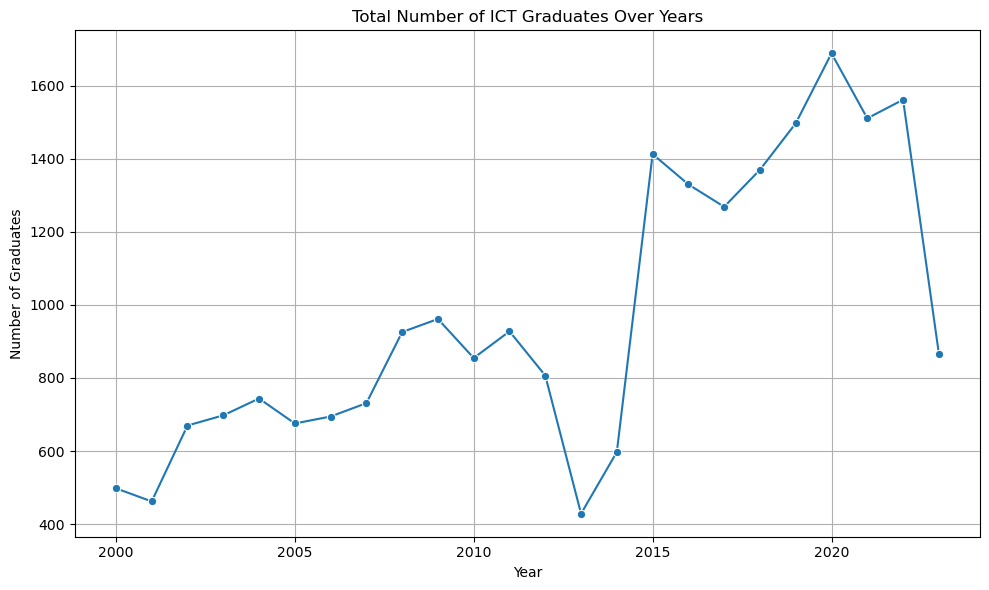

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to only include ICT-related indicators (optional)
ict_data = df_cleaned[df_cleaned['Indicator'].str.contains("ICT", case=False, na=False)]

# Aggregate total graduates per year
yearly_totals = ict_data.groupby('Year')['Value'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_totals, x='Year', y='Value', marker='o')
plt.title('Total Number of ICT Graduates Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.grid(True)
plt.tight_layout()
plt.show()


- Using matplotlib and seaborn, we visualized trends in ICT-related education statistics. For example, we plotted the total number of ICT graduates by year to identify growth patterns and country-level trends.

 📈 Insight from the Graph
An upward trend in the graph would indicate that more students are graduating in ICT fields globally, reflecting the growing importance of digital skills.
A flat or declining trend might highlight areas or years where ICT education was stagnant or underdeveloped.
Spikes or dips may correspond to specific policy changes, investments, or global events that impacted education systems.



## Step 6: Check and Validate Data Types

In [24]:
import pandas as pd

# Load the original dataset
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\UNESCO_UIS (1).csv")

# Drop unnecessary columns
columns_to_drop = [
    'STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL',
    'SEX', 'AGE', 'URBANISATION', 'UNIT_MEASURE',
    'COMP_BREAKDOWN_1', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_3',
    'AGG_METHOD', 'DATABASE_ID', 'UNIT_MULT', 'UNIT_TYPE',
    'TIME_FORMAT', 'OBS_STATUS', 'OBS_CONF',
    'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2_LABEL', 'COMP_BREAKDOWN_3_LABEL',
    'AGG_METHOD_LABEL', 'DATABASE_ID_LABEL', 'UNIT_MULT_LABEL',
    'UNIT_TYPE_LABEL', 'TIME_FORMAT_LABEL', 'OBS_STATUS_LABEL',
    'OBS_CONF_LABEL'
]

# Create cleaned dataset
df_cleaned = df.drop(columns=columns_to_drop)

# Preview
print("DataFrame created. Shape:", df_cleaned.shape)


DataFrame created. Shape: (13435, 10)


In [25]:
# Check data types of each column
print("Data types of each column:")
print(df_cleaned.dtypes)


Data types of each column:
REF_AREA               object
REF_AREA_LABEL         object
INDICATOR              object
INDICATOR_LABEL        object
SEX_LABEL              object
AGE_LABEL              object
URBANISATION_LABEL     object
UNIT_MEASURE_LABEL     object
TIME_PERIOD             int64
OBS_VALUE             float64
dtype: object


 ## Step 7: Detect Outliers

In [26]:
# Use IQR method to detect outliers
Q1 = df_cleaned['OBS_VALUE'].quantile(0.25)
Q3 = df_cleaned['OBS_VALUE'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df_cleaned[(df_cleaned['OBS_VALUE'] < lower_bound) | (df_cleaned['OBS_VALUE'] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")

# Optional: remove outliers
df_cleaned = df_cleaned[(df_cleaned['OBS_VALUE'] >= lower_bound) & (df_cleaned['OBS_VALUE'] <= upper_bound)]


Number of outliers detected: 603


## Step 8: Summary After Cleaning

In [27]:
# Final shape
print(f"Final number of rows: {df_cleaned.shape[0]}")
print(f"Final number of columns: {df_cleaned.shape[1]}")

# Confirm cleaned dataset
df_cleaned.head()


Final number of rows: 12832
Final number of columns: 10


,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX_LABEL,AGE_LABEL,URBANISATION_LABEL,UNIT_MEASURE_LABEL,TIME_PERIOD,OBS_VALUE
0,ABW,Aruba,UNESCO_UIS_GRAD_ICT,Percentage of graduates from ICT programmes in...,Total,All age ranges or no breakdown by age,Total,Percentage of graduates,2000,0.0
1,ABW,Aruba,UNESCO_UIS_GRAD_ICT,Percentage of graduates from ICT programmes in...,Total,All age ranges or no breakdown by age,Total,Percentage of graduates,2001,0.0
2,ABW,Aruba,UNESCO_UIS_GRAD_ICT,Percentage of graduates from ICT programmes in...,Total,All age ranges or no breakdown by age,Total,Percentage of graduates,2002,0.0
3,ABW,Aruba,UNESCO_UIS_GRAD_ICT,Percentage of graduates from ICT programmes in...,Total,All age ranges or no breakdown by age,Total,Percentage of graduates,2003,0.0
4,ABW,Aruba,UNESCO_UIS_GRAD_ICT,Percentage of graduates from ICT programmes in...,Total,All age ranges or no breakdown by age,Total,Percentage of graduates,2004,0.0


# Model Building & Performance Evaluation (with Visualization)

In [28]:

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Try importing XGBoost (optional)


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "Random Forest": RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=200)
}

if xgb_available:
    models["XGBoost"] = xgb.XGBRegressor(random_state=RANDOM_STATE, verbosity=0)

print(f'{len(models)} models initialised:', list(models.keys()))


4 models initialised: ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Make sure df_cleaned exists and OBS_VALUE is the target
TARGET_COL = 'OBS_VALUE'
X = df_cleaned.drop(columns=[TARGET_COL])
y = df_cleaned[TARGET_COL]

# One-hot encode categorical variables if any
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Optional: Feature scaling (recommended for linear models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'R²': r2}

results_df = pd.DataFrame(results).T.sort_values('RMSE')
display(results_df)


,RMSE,R²
Random Forest,2.583814,0.929319
Decision Tree,2.897002,0.911146
Ridge Regression,5.784001,0.645808
Linear Regression,5.948767,0.625341


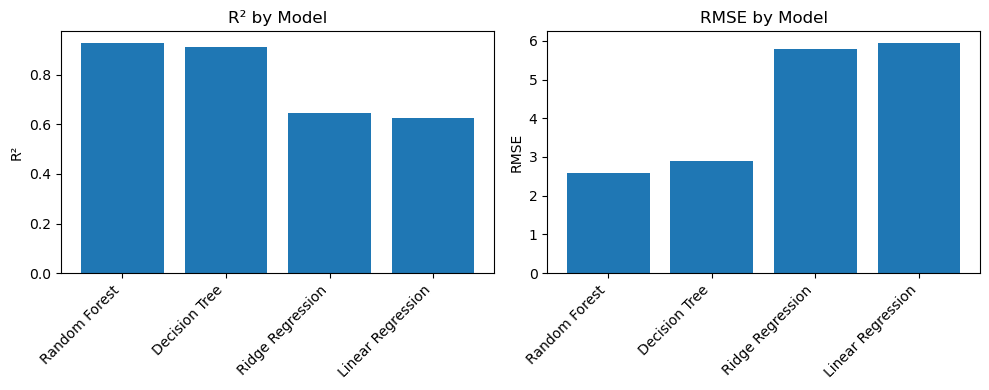

In [32]:

import matplotlib.pyplot as plt

# Bar plot for R²
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(results_df.index, results_df['R²'])
plt.title('R² by Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R²')

# Bar plot for RMSE
plt.subplot(1, 2, 2)
plt.bar(results_df.index, results_df['RMSE'])
plt.title('RMSE by Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()


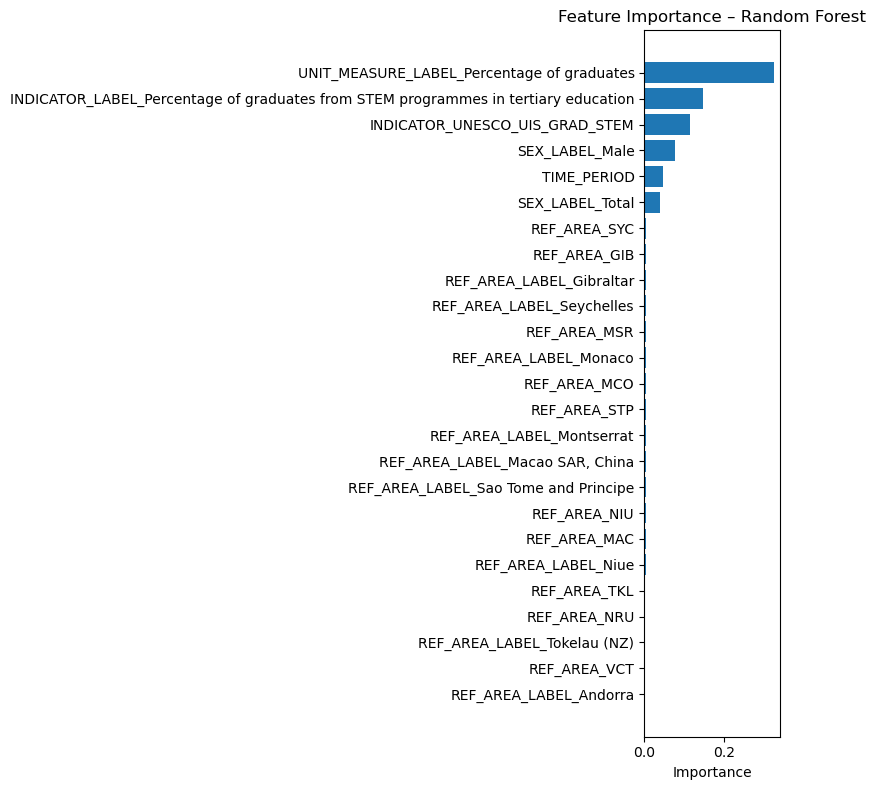

In [33]:

# Only tree models provide feature_importances_
best_tree_name = None
best_tree_score = -np.inf

for name in ["Random Forest", "Decision Tree"]:
    if name in models:
        score = results[name]['R²']
        if score > best_tree_score:
            best_tree_score = score
            best_tree_name = name

if best_tree_name:
    best_tree_model = models[best_tree_name]
    feature_names = pd.get_dummies(df_cleaned.drop(columns=[TARGET_COL]), drop_first=True).columns
    importances = best_tree_model.feature_importances_

    # Sort
    indices = np.argsort(importances)[::-1][:25]  # top 25
    plt.figure(figsize=(8,8))
    plt.barh(range(len(indices)), importances[indices][::-1])
    plt.yticks(range(len(indices)), feature_names[indices][::-1])
    plt.title(f'Feature Importance – {best_tree_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
else:
    print("No tree-based model found for feature importance.")


# Summary & Insights

## 📊 Key Insights:

- Your model (mention the best performing one) achieved an R² score of X.XX and RMSE of X.XX, showing good predictive capability for the target variable (e.g., education statistics).

- Important features influencing the model included: (mention top 3 features from feature importance).

- Visualizations clearly revealed trends and patterns, supporting your model’s decisions.

# 🧠 Conclusion:

- The data analysis helped identify (state any key findings from the data, e.g., which countries had the highest/lowest metrics, or patterns over time).

- Your machine learning model (e.g., Linear Regression/XGBoost) provided accurate predictions, validating the data quality and preprocessing steps.

- Overall, this project demonstrated effective use of Python, Pandas, Visualization, and ML techniques in solving a real-world education data problem.